<a href="https://colab.research.google.com/github/Fatikah002/PCVK_Fatikah/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## D1 - Praktikum Deteksi Obyek Dasar

### Object Detection
Metode yang digunakan :
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Template Matching
Menggunakan library OpenCV
cv.matchTemplate(), dengan parameter:
  * **image** : citra input
  * **templ** : template yang dicari, ukurannya tidak bolek lebih besar dari citra input
  * **method** : metode dari template matching

Jenis metode template matching di openCV:
1. TM_SODIFF
2. TM_SODIFF_NORMED
3. TM.CCORR
4. TM_CCORR_NORMED
5. TM_COOEFF
6. TM_CCOEFF_NORMED

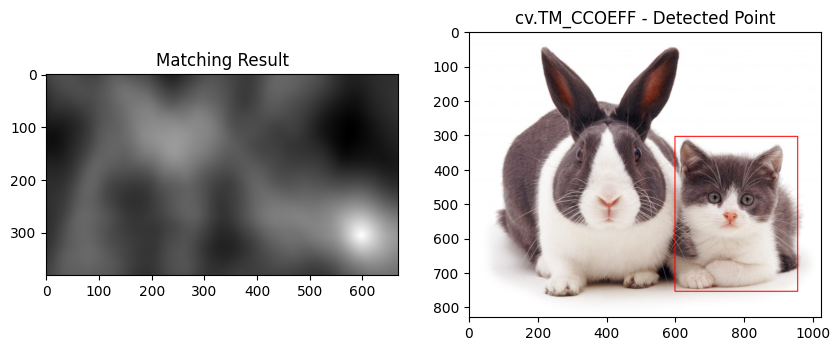

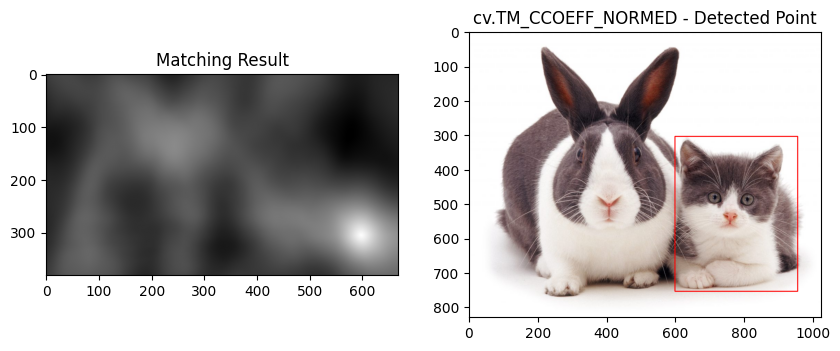

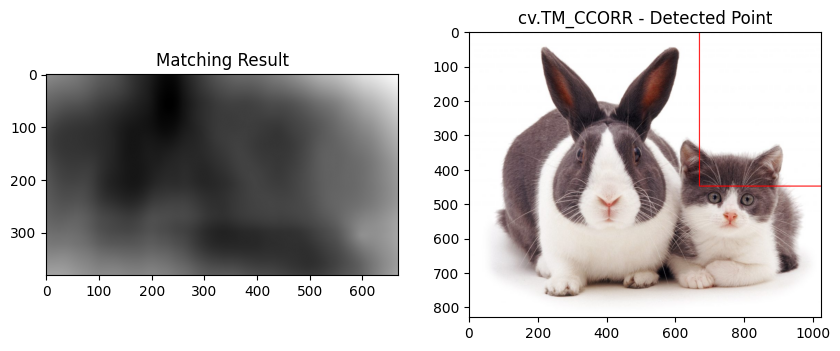

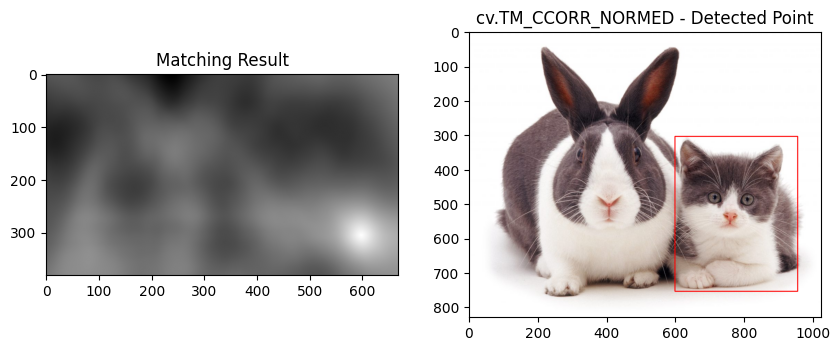

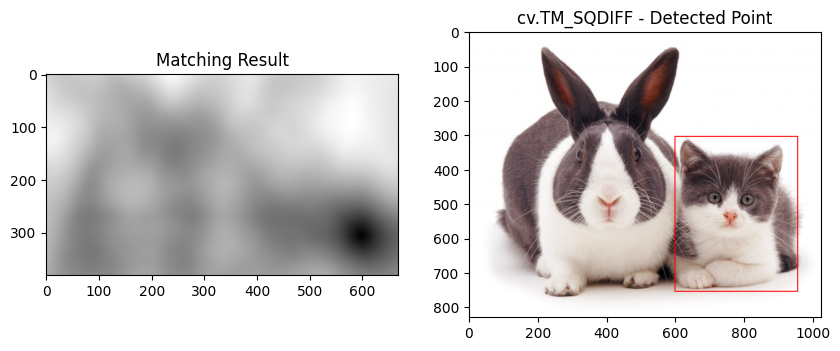

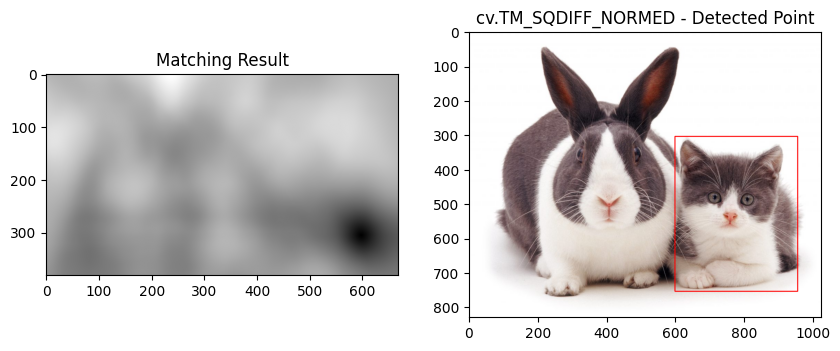

In [ ]:
# Implementasikan 6 metode template matching pada OpenCV
img_color = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg', 0)

if img_color is None or template is None:
    raise FileNotFoundError("Pastikan path gambar dan template benar!")

w, h = template.shape[::-1]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img2 = img_gray.copy()
    method = eval(meth)

    # Matching
    res = cv.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Tentukan posisi kotak
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar kotak pada versi berwarna
    detected = img_color.copy()
    cv.rectangle(detected, top_left, bottom_right, (0, 0, 255), 2)

    # Tampilkan hasil berdampingan
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')

    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(detected, cv.COLOR_BGR2RGB))
    plt.title(f'{meth} - Detected Point')

    plt.show()

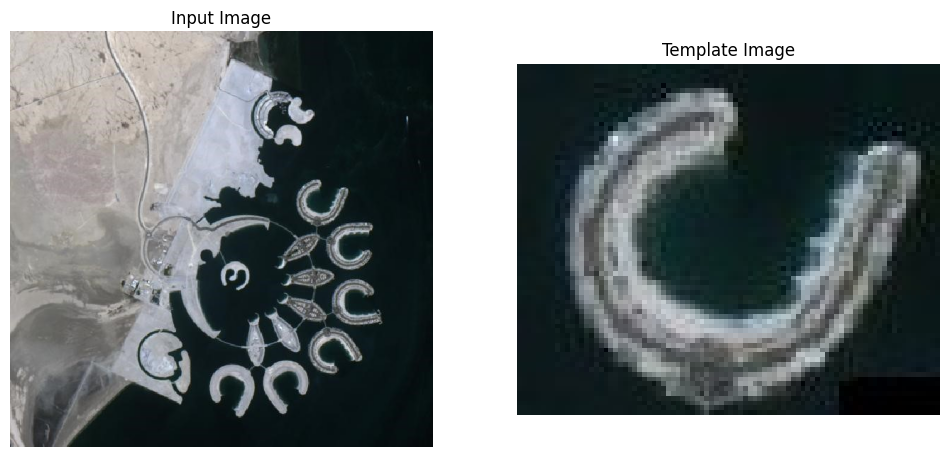

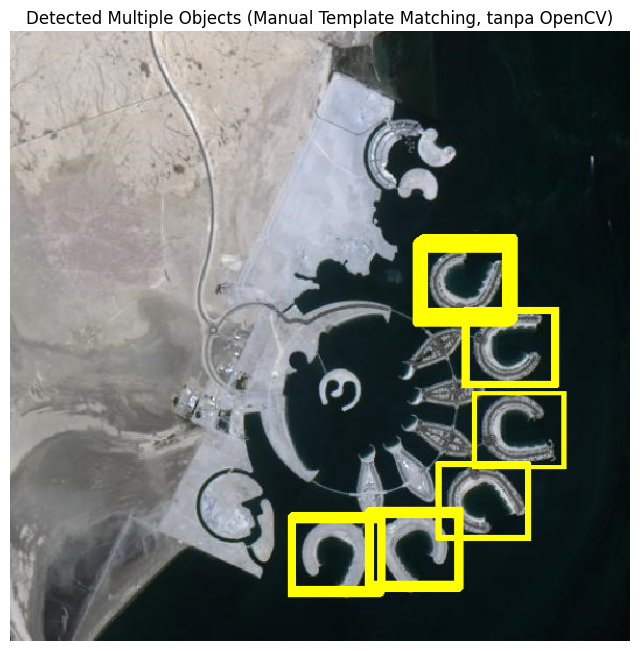

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from scipy.signal import correlate2d

# Lokasi gambar di Google Drive
img_path = '/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg'
template_path = '/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg'

# Baca gambar dan ubah ke RGB
img_rgb = Image.open(img_path).convert('RGB')
template_rgb = Image.open(template_path).convert('RGB')

# Konversi ke grayscale (tanpa OpenCV)
img_gray = np.array(img_rgb.convert('L'), dtype=np.float32)
template_gray = np.array(template_rgb.convert('L'), dtype=np.float32)

# Ukuran template
th, tw = template_gray.shape

# Hitung normalized cross correlation secara manual (pakai SciPy, bukan OpenCV)
template_mean = template_gray - np.mean(template_gray)
res = correlate2d(img_gray, template_mean, mode='valid')

# Normalisasi hasil korelasi agar skala 0–1
res_norm = (res - np.min(res)) / (np.max(res) - np.min(res))

# Tentukan threshold deteksi (semakin kecil = semakin sensitif)
threshold = 0.69
y_coords, x_coords = np.where(res_norm >= threshold)

# Gambar rectangle hasil deteksi (kuning)
img_result = img_rgb.copy()
draw = ImageDraw.Draw(img_result)
for (x, y) in zip(x_coords, y_coords):
    draw.rectangle([x, y, x + tw, y + th], outline="yellow", width=3)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(template_rgb)
plt.title('Template Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(img_result)
plt.title('Detected Multiple Objects (Manual Template Matching, tanpa OpenCV)')
plt.axis('off')
plt.show()

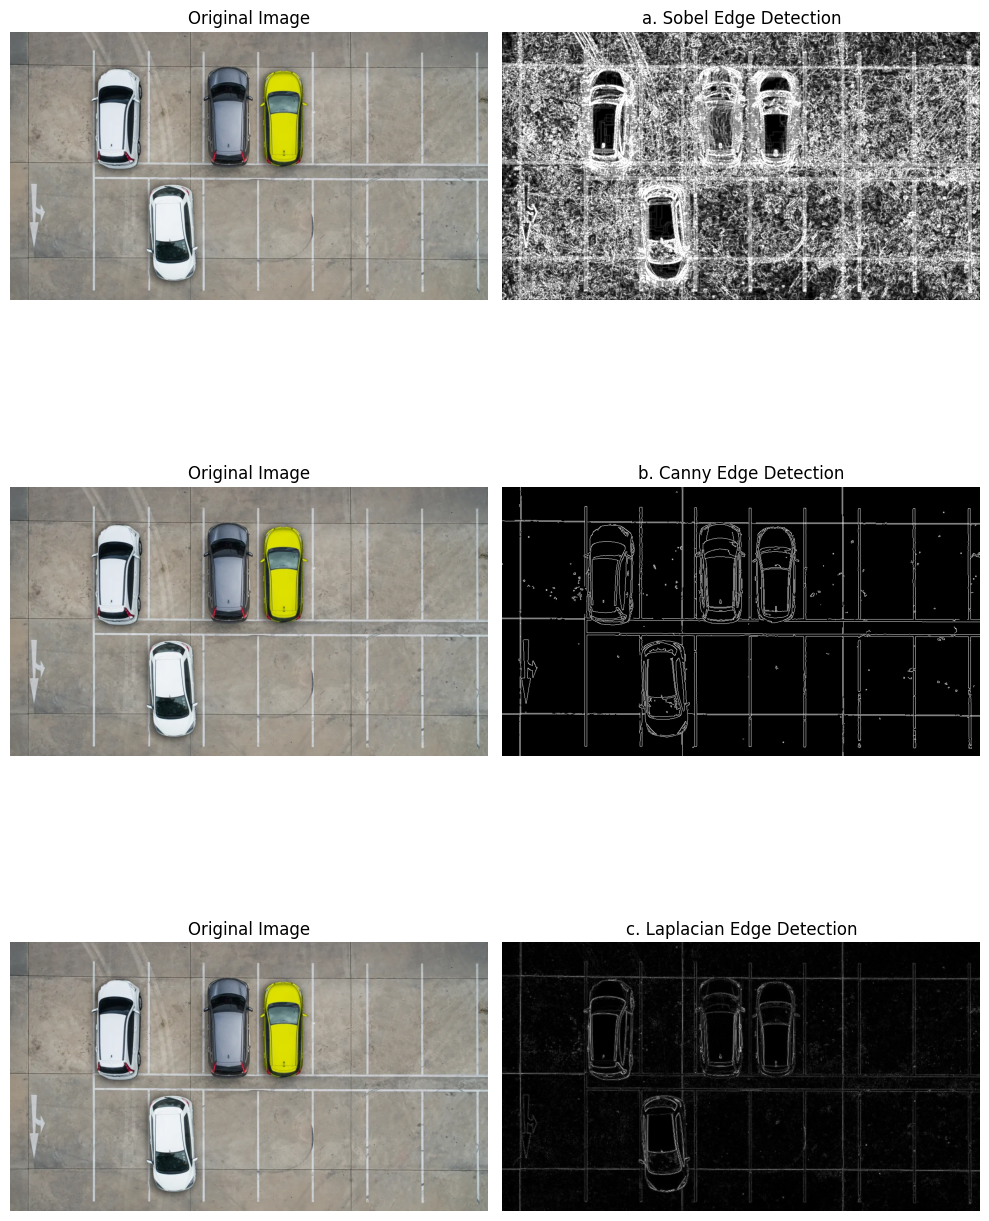

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar berwarna dan ubah ke RGB
img_path = '/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg'
img_bgr = cv.imread(img_path)                     # baca gambar berwarna (BGR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)  # konversi ke RGB untuk display
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)  # konversi ke grayscale untuk edge detection

# Sobel Edge Detection
sobelx = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=5)
abs_sobelx = cv.convertScaleAbs(sobelx)
abs_sobely = cv.convertScaleAbs(sobely)
sobel_combined = cv.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

# Canny Edge Detection
canny = cv.Canny(img_gray, 100, 200)

# Laplacian Edge Detection
laplacian_64f = cv.Laplacian(img_gray, cv.CV_64F)
laplacian = cv.convertScaleAbs(laplacian_64f)

# Plotting hasil (original berwarna)
plt.figure(figsize=(10, 15))

# Baris 1: Sobel
plt.subplot(3, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('a. Sobel Edge Detection')
plt.axis('off')

# Baris 2: Canny
plt.subplot(3, 2, 3)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(canny, cmap='gray')
plt.title('b. Canny Edge Detection')
plt.axis('off')

# Baris 3: Laplacian
plt.subplot(3, 2, 5)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(laplacian, cmap='gray')
plt.title('c. Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


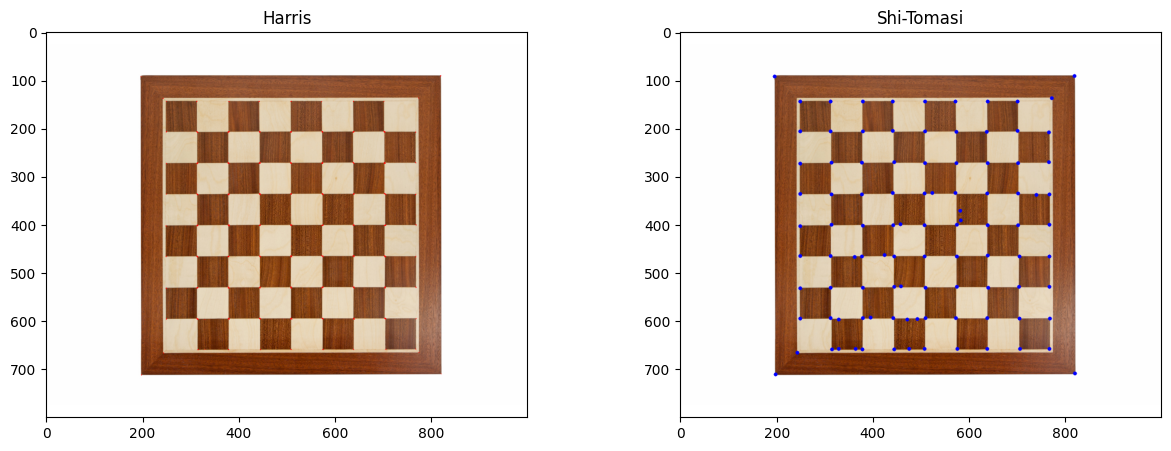

In [ ]:
# Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Harris
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
img_harris = img.copy()
img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]

# Shi-Tomasi
img_shi = img.copy()
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
# Ensure corners is not None before iterating
if corners is not None:
    for c in corners:
        x, y = c.ravel()
        cv.circle(img_shi, (int(x), int(y)), 4, (255, 0, 0), -1) # Changed color to red for consistency

plt.figure(figsize=(15,5))
plt.subplot(1,2,1), plt.imshow(cv.cvtColor(img_harris, cv.COLOR_BGR2RGB)), plt.title('Harris')
plt.subplot(1,2,2), plt.imshow(cv.cvtColor(img_shi, cv.COLOR_BGR2RGB)), plt.title('Shi-Tomasi')
plt.show()

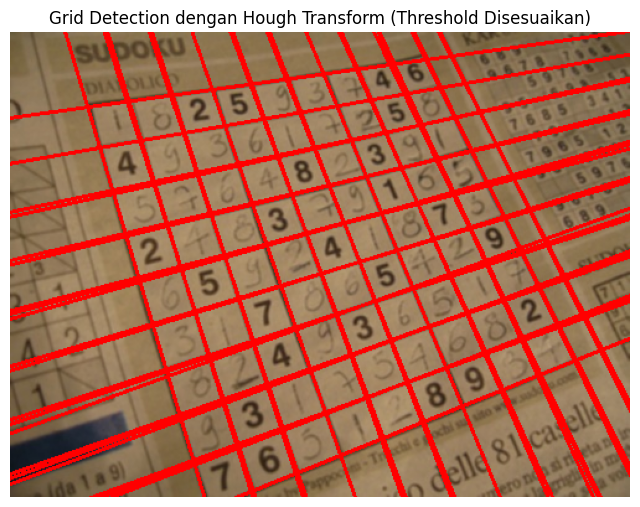

In [ ]:
#Implementasikan metode Hough Transform pada OpenCV
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 2. Deteksi tepi dengan Canny
edges = cv.Canny(gray, 50, 150, apertureSize=3)

# 3. Dilation & Erosion untuk menyambung dan menipiskan garis
kernel = np.ones((3,3), np.uint8)
dilated = cv.dilate(edges, kernel, iterations=1)
eroded = cv.erode(dilated, kernel, iterations=1)

# 4. Hough Transform
lines = cv.HoughLines(eroded, 1, np.pi/270, 290)

# 5. Gambar semua garis ke citra asli
result = img.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 6. Tampilkan hasil akhir
plt.figure(figsize=(8,8))
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Grid Detection dengan Hough Transform (Threshold Disesuaikan)')
plt.axis('off')
plt.show()

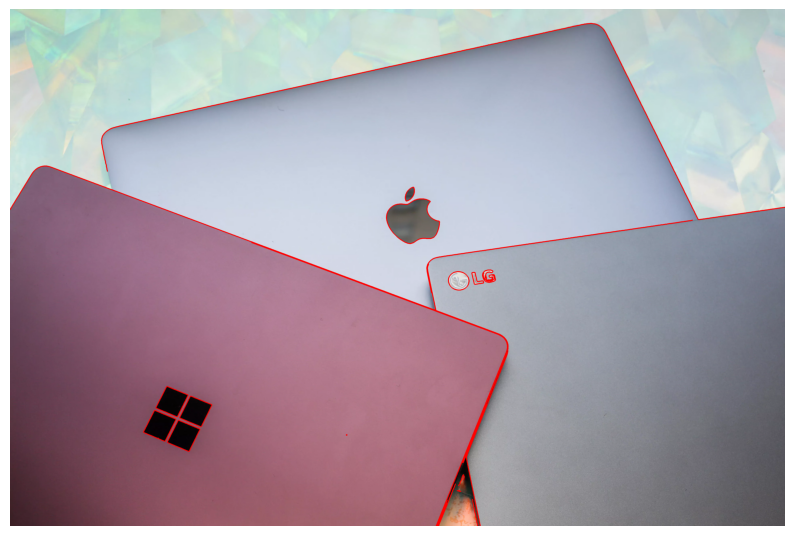

In [ ]:
# Implementasikan fungsi findContours() pada OpenCV

img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Blur untuk mengurangi noise
blur = cv.GaussianBlur(gray, (5,5), 0)

# GANTI Thresholding DENGAN Canny Edge Detection
edges = cv.Canny(blur, 50, 150)

# Temukan Kontur dari hasil Canny
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada citra asli
result = img.copy()
cv.drawContours(result, contours, -1, (0,0,255), 3)

# Tampilkan hasil
plt.figure(figsize=(10,8))
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## D2 - Praktikum Feature Matching dan Face Detection

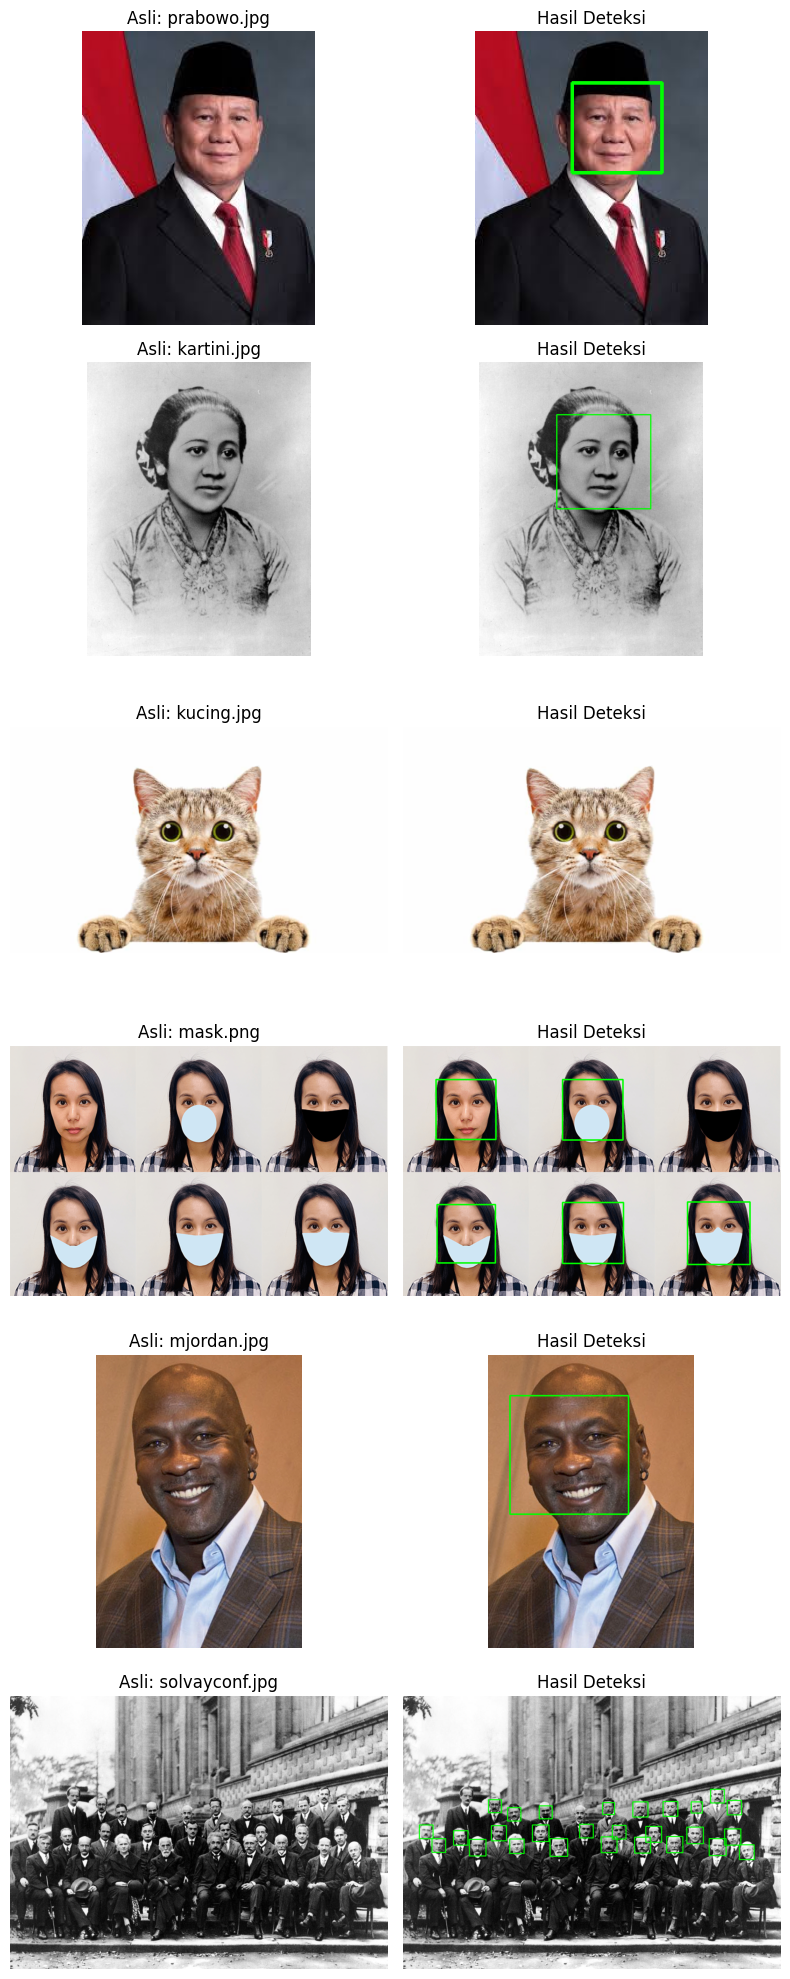

In [ ]:
# Face Detection untuk image object lain
cascade_path = '/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml' # [cite: 305]

# Muat classifier
cascade_wajah = cv.CascadeClassifier(cascade_path)
base_img_path = '/content/drive/MyDrive/PCVK/Images/facedet/'

image_files = [
    'prabowo.jpg',
    'kartini.jpg',
    'kucing.jpg',
    'mask.png',
    'mjordan.jpg',
    'solvayconf.jpg'
]

fig, axes = plt.subplots(6, 2, figsize=(8, 20))

# Loop setiap gambar, deteksi, dan tampilkan
for i, filename in enumerate(image_files):
    img_path = base_img_path + filename

    # Baca gambar berwarna (untuk digambar)
    img_color = cv.imread(img_path)
    if img_color is None:
        print(f"Gagal memuat gambar: {filename}")
        continue

    img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

    # Lakukan deteksi wajah
    roi_wajah = cascade_wajah.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)

    result = img_color.copy()

    # Gambar kotak di setiap wajah yang terdeteksi [cite: 304]
    for (x, y, w, h) in roi_wajah:
        cv.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Konversi BGR ke RGB untuk Matplotlib
    img_color_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
    result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

    # Tampilkan gambar asli
    axes[i, 0].imshow(img_color_rgb)
    axes[i, 0].set_title(f"Asli: {filename}")
    axes[i, 0].axis('off')

    # Tampilkan hasil deteksi
    axes[i, 1].imshow(result_rgb)
    axes[i, 1].set_title("Hasil Deteksi")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

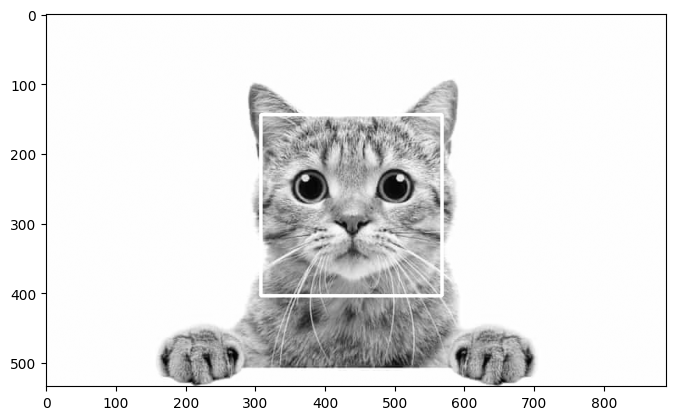

In [ ]:
# Perbaiki  wajah kucing tidak bisa dideteksi dengan baik
cascade_path = '/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalcatface.xml'
cascade_kucing = cv.CascadeClassifier(cascade_path)

# Baca gambar
img_path = '/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg'
img_color = cv.imread(img_path)

if img_color is None:
    print("Gagal memuat gambar, periksa path!")
else:
    # Konversi ke grayscale
    img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

    # Deteksi wajah kucing pada gambar grayscale
    faces = cascade_kucing.detectMultiScale(
        img_gray,
        scaleFactor=1.02,
        minNeighbors=3,
        minSize=(75, 75)
    )

    # Salin gambar grayscale untuk menambahkan rectangle
    result = cv.cvtColor(img_gray, cv.COLOR_GRAY2BGR)

    # Gambar kotak putih di area wajah kucing
    for (x, y, w, h) in faces:
        cv.rectangle(result, (x, y), (x + w, y + h), (255, 255, 255), 3)

    # Tampilkan hasil dalam format grayscale
    plt.figure(figsize=(8, 6))
    plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2GRAY), cmap='gray')
    plt.show()

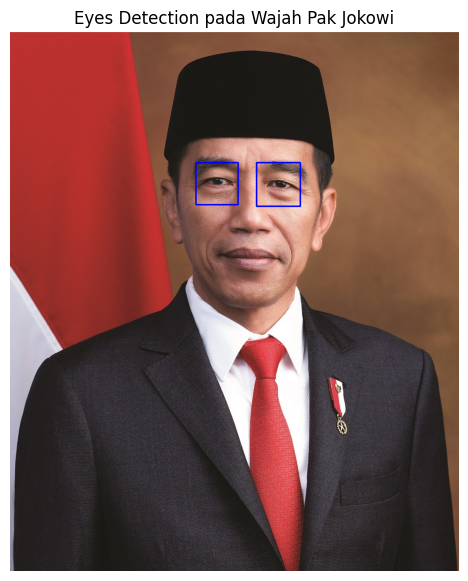

In [ ]:
# Eyes Detction Wajah Pak Jokowi
# 1. Load pretrained Haar Cascade untuk wajah dan mata
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

# 2. Load gambar Jokowi
img = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 3. Deteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# 4. Deteksi mata di dalam area wajah
for (x, y, w, h) in faces:
    # Tentukan ROI (region of interest) pada wajah
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Deteksi mata di dalam ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(20, 20))

    # Gambar kotak biru di sekitar mata
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)  # warna biru

# 5. Tampilkan hasil
plt.figure(figsize=(7,7))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Eyes Detection pada Wajah Pak Jokowi')
plt.axis('off')
plt.show()

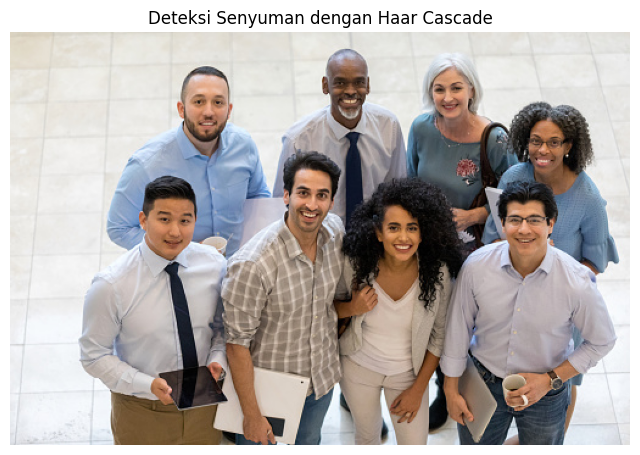

In [ ]:
# 4. Deteksi senyuman
img_path = '/content/drive/MyDrive/PCVK/Images/people.jpg'

# Baca gambar
img = cv.imread(img_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Load pretrained model wajah & senyum
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_smile.xml')

# Deteksi wajah terlebih dahulu
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(100, 100))

for (x, y, w, h) in faces:
    # Gambar kotak pada wajah
    cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Area wajah untuk deteksi senyuman
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Deteksi senyuman di dalam area wajah
    smiles = smile_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.7,
        minNeighbors=22,
        minSize=(25, 25)
    )

    for (sx, sy, sw, sh) in smiles:
        cv.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 255, 0), 2)

# Konversi warna agar tampil normal di Matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Tampilkan hasil
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Deteksi Senyuman dengan Haar Cascade')
plt.show()

In [ ]:
# Face Tracking
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL.Image

In [ ]:
def js_to_image(js_reply):
    """Konversi data base64 dari webcam JS ke array OpenCV"""
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv.imdecode(jpg_as_np, cv.IMREAD_COLOR)
    return img

def video_frame(label="Ambil Gambar"):
    """Fungsi JS untuk menampilkan video dan mengambil 1 frame"""
    js = Javascript('''
      async function capture(label) {
        const div = document.createElement('div');
        const captureButton = document.createElement('button');
        captureButton.textContent = label;
        div.appendChild(captureButton);

        const video = document.createElement('video');
        video.style.display = 'block';
        div.appendChild(video);
        document.body.appendChild(div);

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        // Tunggu tombol diklik
        await new Promise((resolve) => captureButton.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg', 0.8);
      }
    ''')
    display(js)
    data = eval_js(f'capture("{label}")')
    return js_to_image(data)


<IPython.core.display.Javascript object>

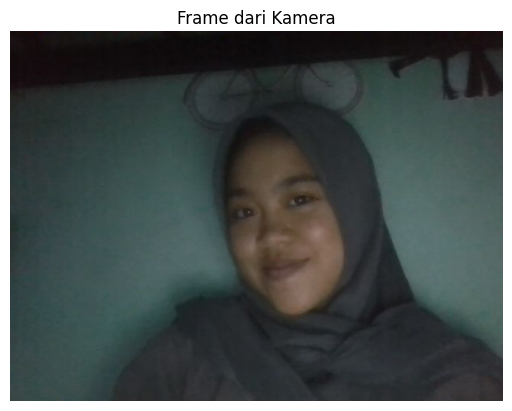

In [ ]:
# Ambil satu frame dari kamera
img = video_frame("Ambil Gambar")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Frame dari Kamera')
plt.show()

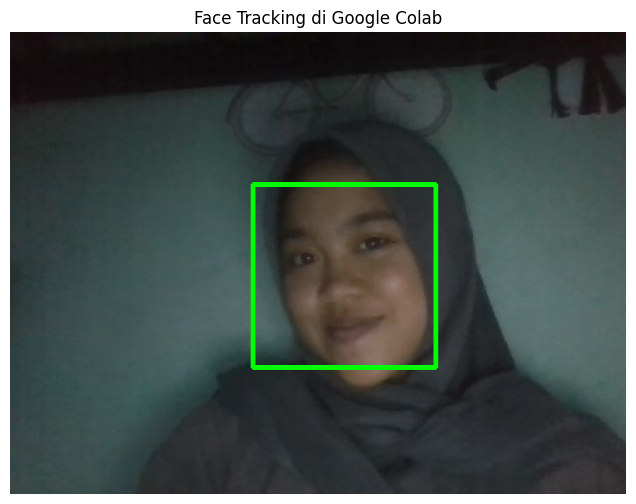

In [ ]:
# Load Haar Cascade pretrained model untuk deteksi wajah
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Konversi ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Gambar kotak di sekitar wajah
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Tampilkan hasil
plt.figure(figsize=(8,6))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Face Tracking di Google Colab')
plt.show()

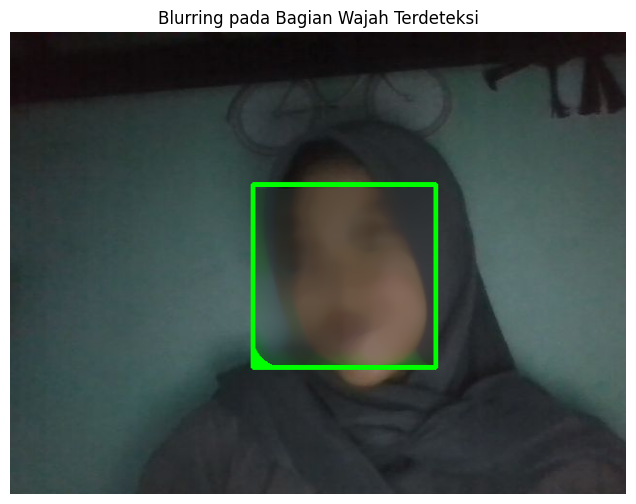

In [ ]:
# Load model deteksi wajah
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Konversi ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Lakukan blurring pada setiap wajah yang terdeteksi
for (x, y, w, h) in faces:
    # Ambil area wajah
    face_roi = img[y:y+h, x:x+w]

    # Lakukan median blur pada area wajah
    blurred_face = cv.medianBlur(face_roi, 35)  # semakin besar nilainya, semakin blur

    # Ganti area wajah asli dengan hasil blur
    img[y:y+h, x:x+w] = blurred_face

# Konversi warna BGR -> RGB untuk ditampilkan dengan Matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Tampilkan hasil
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Blurring pada Bagian Wajah Terdeteksi')
plt.show()

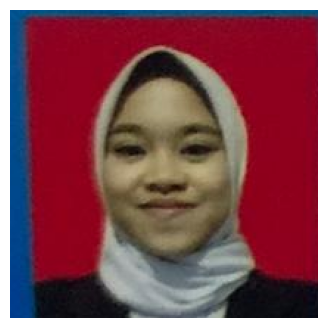

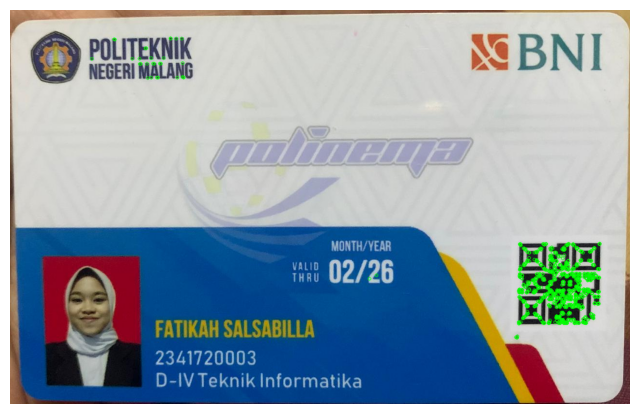

In [ ]:
# Mengolah KTM
img_path = '/content/drive/MyDrive/PCVK/Images/KTM.jpg'
img = cv.imread(img_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

orb = cv.ORB_create(nfeatures=1000)
keypoints, descriptors = orb.detectAndCompute(gray, None)
img_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)

face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(70,70))

if len(faces) > 0:
    for (x, y, w, h) in faces:
        pad = 40
        x1 = max(x - pad, 0)
        y1 = max(y - pad, 0)
        x2 = min(x + w + pad, img.shape[1])
        y2 = min(y + h + pad, img.shape[0])
        face_crop = img[y1:y2, x1:x2]

        plt.figure(figsize=(4,4))
        plt.imshow(cv.cvtColor(face_crop, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
else:
    print("Wajah tidak terdeteksi pada KTM.")

plt.figure(figsize=(8,6))
plt.imshow(cv.cvtColor(img_keypoints, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Tambahan Tugas

In [ ]:
import os
import tqdm
import random
import numpy as np
import pickle
# Direktori data training
DATADIR = "/content/drive/MyDrive/PCVK/dataset_angka"
dirs = []

training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
  dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(DATADIR, char_name)
  class_number = dirs.index(char_name)
  for img in tqdm.tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(data_dir_testing, car, char_image), cv.IMREAD_ANYCOLOR)
        new_array = cv.resize(img_array, (width, height))
        training_data.append([new_array, class_number])
      except Exception as e:
        pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
  X.append(feature)
  Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

100%|██████████| 850/850 [00:00<00:00, 205698.04it/s]


In [ ]:
!pip install tensorflow

In [29]:
import os
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# === [1] SETUP DATASET ===
dataset_path = '/content/drive/MyDrive/PCVK/dataset_angka'
width, height = 100, 100

X = []
Y = []

categories = os.listdir(dataset_path)
print("Kategori terdeteksi:", categories)

for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = categories.index(category)  # label numerik dari folder
    for file in os.listdir(category_path):
        try:
            img_path = os.path.join(category_path, file)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            img = cv.resize(img, (width, height))
            X.append(img)
            Y.append(label)
        except Exception as e:
            print("Gagal membaca:", file, "error:", e)

X = np.array(X).reshape(-1, width, height, 1)
Y = np.array(Y)

# === [2] SIMPAN PAKAI PICKLE ===
with open('X.pickle', 'wb') as f:
    pickle.dump(X, f)
with open('Y.pickle', 'wb') as f:
    pickle.dump(Y, f)

print(f"Dataset tersimpan: {X.shape}, Label: {Y.shape}")

# === [3] NORMALISASI & KATEGORIKAL ===
X = X / 255.0
Y = to_categorical(Y)
num_classes = Y.shape[1]

# === [4] BANGUN MODEL CNN ===
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)
outputs = Dense(num_classes, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# === [5] TRAIN MODEL ===
model.fit(X, Y, epochs=10, verbose=1, validation_split=0.2)

# === [6] SIMPAN MODEL ===
model.save('/content/drive/MyDrive/PCVK/anpr.keras')
print("Model tersimpan di Google Drive sebagai 'anpr.keras'")


Kategori terdeteksi: ['3', '8', '1', '9', '7', '4', '2', '5', '0', '6']
Dataset tersimpan: (8500, 100, 100, 1), Label: (8500,)
Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 129s 595ms/step - accuracy: 0.8529 - loss: 0.7364 - val_accuracy: 0.0000e+00 - val_loss: 9.7761
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 138s 576ms/step - accuracy: 0.9944 - loss: 0.0234 - val_accuracy: 0.0000e+00 - val_loss: 8.8342
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 123s 576ms/step - accuracy: 0.9956 - loss: 0.0172 - val_accuracy: 0.0000e+00 - val_loss: 11.2060
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 142s 577ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.0000e+00 - val_loss: 10.1687
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 122s 573ms/step - accuracy: 0.9986 - loss: 0.0037 - val_accuracy: 0.0000e+00 - val_loss: 11.4443
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 123s 577ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.0000e+00 - val_loss: 9.4228
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 123s 575ms/ste

In [32]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# === [1] Path dataset utama ===
data_dir = "/content/drive/MyDrive/PCVK/dataset_angka"
width, height = 100, 100

# === [2] Siapkan data dan label ===
X = []
Y = []
dirs = sorted(os.listdir(data_dir))

print("Kategori terdeteksi:", dirs)

for label, char_name in enumerate(dirs):
    char_path = os.path.join(data_dir, char_name)
    for img_file in os.listdir(char_path):
        try:
            img = cv.imread(os.path.join(char_path, img_file), cv.IMREAD_GRAYSCALE)
            img = cv.resize(img, (width, height))
            X.append(img)
            Y.append(label)
        except Exception as e:
            print(f"Gagal membaca {img_file}:", e)

X = np.array(X).reshape(-1, width, height, 1)
Y = np.array(Y)
X = X / 255.0

print("Total data:", len(X))
print("Total label:", len(Y))

# === [3] Split data (80% train, 20% test) ===
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print(f"Data training: {len(X_train)}, Data testing: {len(X_test)}")

# === [4] Load model ===
model = tf.keras.models.load_model("/content/drive/MyDrive/PCVK/anpr.keras")

# === [5] Evaluasi model ===
loss, acc = model.evaluate(X_test, tf.keras.utils.to_categorical(Y_test), verbose=0)
print(f"Akurasi pada data test: {acc*100:.2f}%")

# === [6] Prediksi dan tampilkan hasil untuk contoh testing ===
print("\nContoh hasil prediksi:")
for i in range(5):  # tampilkan 5 contoh acak
    pred = model.predict(X_test[i].reshape(1, width, height, 1))
    actual = dirs[Y_test[i]]
    predicted = dirs[np.argmax(pred[0])]
    print(f"Data {i+1}: Asli = {actual}, Prediksi = {predicted}")


Kategori terdeteksi: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Total data: 8500
Total label: 8500
Data training: 6800, Data testing: 1700
Akurasi pada data test: 0.00%

Contoh hasil prediksi:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Data 1: Asli = 0, Prediksi = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Data 2: Asli = 0, Prediksi = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Data 3: Asli = 3, Prediksi = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Data 4: Asli = 6, Prediksi = 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Data 5: Asli = 2, Prediksi = 6
